# Homework 1 - Jupyter and Python
We will be making heavy use of the Python library called NumPy. It is not included by default, so we first need to import it. Go ahead and run the following cell:

In [1]:
import numpy as np

Now, we have access to all NumPy functions via the variable `np` (this is the convention in the Scientific Python community for referring to NumPy). We can take a look at what this variable actually is, and see that it is in fact the `numpy` module (remember that you will need to have run the cell above before `np` will be defined!):

In [2]:
np

<module 'numpy' from '/home/ryan/.conda/envs/work/lib/python3.9/site-packages/numpy/__init__.py'>

NumPy is incredibly powerful and has many features, but this can be a bit intimidating when you're first starting to use it. If you are familiar with other scientific computing languages, the following guides may be of use:
* NumPy for Matlab Users: https://numpy.org/devdocs/user/numpy-for-matlab-users.html
* NumPy for R (and S-Plus) Users: http://mathesaurus.sourceforge.net/r-numpy.html

If not, don't worry! Here we'll go over the most common NumPy features.

## Arrays and lists

The core component of NumPy is the `ndarray`, which is pronounced like "N-D array" (i.e., 1-D, 2-D, ..., N-D). We'll use both the terms `ndarray` and "array" interchangeably. For now, we're going to stick to just 1-D arrays -- we'll get to multidimensional arrays later.

Arrays are very similar to `lists`. Let's first review how lists work. Remember that we can create them using square brackets:

In [3]:
mylist = [3, 6, 1, 0, 10, 3]
mylist

[3, 6, 1, 0, 10, 3]

And we can access an element via its *index*. To get the first element, we use an index of 0:

In [4]:
print("The first element of 'mylist' is: " + str(mylist[0]))

The first element of 'mylist' is: 3


To get the second element, we use an index of 1:

In [5]:
print("The second element of 'mylist' is: " + str(mylist[1]))

The second element of 'mylist' is: 6


And so on.

Arrays work very similarly. The first way to create an array is from an already existing list:

In [6]:
myarray = np.array(mylist) # equivalent to np.array([3, 6, 1, 0, 10, 3])
myarray

array([ 3,  6,  1,  0, 10,  3])

<div class="alert alert-info">
Notice that <code>myarray</code> looks different than <code>mylist</code> -- it actually tells you that it's an array. If we take a look at the <i>types</i> of <code>mylist</code> and <code>myarray</code>, we will also see that one is a list and one is an array. Using <code>type</code> can be a very useful way to verify that your variables contain what you want them to contain:
</div>

In [7]:
# look at what type mylist is
type(mylist)

list

In [8]:
# look at what type myarray is
type(myarray)

numpy.ndarray

We can get elements from a NumPy array in exactly the same way as we get elements from a list:

In [9]:
print("The first element of 'myarray' is: " + str(myarray[0]))
print("The second element of 'myarray' is: " + str(myarray[1]))

The first element of 'myarray' is: 3
The second element of 'myarray' is: 6


## Array slicing

<div class="alert alert-info">Also like lists, we can use "slicing" to get different parts of the array. Slices look like
<code>myarray[a:b:c]</code>, where <code>a</code>, <code>b</code>, and <code>c</code> are all optional (though you have to specify at least one). <code>a</code> is the index of the beginning of the slice, <code>b</code> is the index of the end of the slice (exclusive), and <code>c</code> is the step size.
</div>

Note that the exclusive slice indexing described above is different than some other languages you may be familiar with, like Matlab and R. `myarray[1:2]` returns only the second elment in myarray in Python, instead of the first and second element. 

First, let's quickly look at what is in our array and list (defined above), for reference:

In [10]:
print("mylist:", mylist)
print("myarray:", myarray)

mylist: [3, 6, 1, 0, 10, 3]
myarray: [ 3  6  1  0 10  3]


Now, to get all elements except the first:

In [11]:
myarray[1:]

array([ 6,  1,  0, 10,  3])

To get all elements except the last:

In [12]:
myarray[:-1]

array([ 3,  6,  1,  0, 10])

To get all elements except the first and the last:

In [13]:
myarray[1:-1]

array([ 6,  1,  0, 10])

To get every other element of the array (beginning from the *first* element):

In [14]:
myarray[::2]

array([ 3,  1, 10])

To get every element of the array (beginning from the *second* element):

In [15]:
myarray[1::2]

array([6, 0, 3])

And to reverse the array:

In [16]:
myarray[::-1]

array([ 3, 10,  0,  1,  6,  3])

## Array computations

So far, NumPy arrays seem basically the same as regular lists. What's the big deal about them?

### Working with single arrays

One advantage of using NumPy arrays over lists is the ability to do a computation over the entire array. For example, if you were using lists and wanted to add one to every element of the list, here's how you would do it:

In [17]:
mylist = [3, 6, 1, 0, 10, 22]
mylist_plus1 = []
for x in mylist:
    mylist_plus1.append(x + 1)
mylist_plus1

[4, 7, 2, 1, 11, 23]

Or, you could use a list comprehension:

In [18]:
mylist = [3, 6, 1, 0, 10, 22]
mylist_plus1 = [x + 1 for x in mylist]
mylist_plus1

[4, 7, 2, 1, 11, 23]

<div class="alert alert-danger">
If you haven't seen list comprehensions before, we <b>strongly</b> recommend that you go through the <a href="http://www.codecademy.com/tracks/python">"Advanced Topics" section on Codecademy</a> before proceeding!:
</div>

In contrast, adding one to every element of a NumPy array is far simpler:

In [19]:
myarray = np.array([3, 6, 1, 0, 10, 22])
myarray_plus1 = myarray + 1
myarray_plus1

array([ 4,  7,  2,  1, 11, 23])

This won't work with normal lists. For example, if you ran `mylist + 1`, you'd get an error like this:

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-19-5b3951a16990> in <module>()
----> 1 mylist + 1

TypeError: can only concatenate list (not "int") to list
```

We can do the same thing for subtraction, multiplication, etc.:

In [20]:
print("Subtraction: \t" + str(myarray - 2))
print("Multiplication:\t" + str(myarray * 10))
print("Squared: \t" + str(myarray ** 2))
print("Square root: \t" + str(np.sqrt(myarray)))
print("Exponential: \t" + str(np.exp(myarray)))

Subtraction: 	[ 1  4 -1 -2  8 20]
Multiplication:	[ 30  60  10   0 100 220]
Squared: 	[  9  36   1   0 100 484]
Square root: 	[1.73205081 2.44948974 1.         0.         3.16227766 4.69041576]
Exponential: 	[2.00855369e+01 4.03428793e+02 2.71828183e+00 1.00000000e+00
 2.20264658e+04 3.58491285e+09]


### Working with multiple arrays

We can also easily do these operations for multiple arrays. For example, let's say we want to add the corresponding elements of two lists together. Here's how we'd do it with regular lists:

In [21]:
list_a = [1, 2, 3, 4, 5]
list_b = [6, 7, 8, 9, 10]
list_c = [list_a[i] + list_b[i] for i in range(len(list_a))]
list_c

[7, 9, 11, 13, 15]

With NumPy arrays, we just have to add the arrays together:

In [22]:
array_a = np.array(list_a) # equivalent to np.array([1, 2, 3, 4, 5])
array_b = np.array(list_b) # equivalent to np.array([6, 7, 8, 9, 10])
array_c = array_a + array_b
array_c

array([ 7,  9, 11, 13, 15])

<div class="alert alert-warning">
Note: make sure when adding arrays that you are actually working with arrays, because if you try to add two lists, you will *not* get an error. Instead, the lists will be concatenated:
</div>

In [23]:
list_a + list_b

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Just as when we are working with a single array, we can add, subtract, divide, multiply, etc. several arrays together:

In [24]:
print("Subtraction: \t" + str(array_a - array_b))
print("Multiplication:\t" + str(array_a * array_b))
print("Exponent: \t" + str(array_a ** array_b))
print("Division: \t" + str(array_a / array_b))

Subtraction: 	[-5 -5 -5 -5 -5]
Multiplication:	[ 6 14 24 36 50]
Exponent: 	[      1     128    6561  262144 9765625]
Division: 	[0.16666667 0.28571429 0.375      0.44444444 0.5       ]


## Creating and modifying arrays

One thing that you can do with lists that you *cannot* do with NumPy arrays is adding and removing elements. For example, I can create a list and then add elements to it with `append`:

In [25]:
mylist = []
mylist.append(7)
mylist.append(2)
mylist

[7, 2]

However, you *cannot* do this with NumPy arrays. If you tried to run the following code, for example:

```python
myarray = np.array([])
myarray.append(7)
```

You'd get an error like this:

```
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-25-0017a7f2667c> in <module>()
      1 myarray = np.array([])
----> 2 myarray.append(7)

AttributeError: 'numpy.ndarray' object has no attribute 'append'
```

<div class="alert alert-info">To create a NumPy array, you must create an array with the correct shape <i>from the beginning</i>. However, the array doesn't have to have all the correct values from the very beginning: these you can fill in later.</div>

There are a few ways to create a new array with a particular size:

* `np.empty(size)` -- creates an empty array of size `size`
* `np.zeros(size)` -- creates an array of size `size` and sets all the elements to zero
* `np.ones(size)` -- creates an array of size `size` and sets all the elements to one

So the way that we would create an array like the list above is:

In [26]:
myarray = np.empty(2) # create an array of size 2
myarray[0] = 7
myarray[1] = 2
myarray

array([7., 2.])

<div class="alert alert-info">
Another very useful function for creating arrays is <code>np.arange</code>, which will create an array containing a sequence of numbers (it is very similar to the built-in <code>range</code> or <code>xrange</code> functions in Python).
</div>

Here are a few examples of using `np.arange`. Try playing around with them and make sure you understand how it works:

In [27]:
# create an array of numbers from 0 to 3
np.arange(3)

array([0, 1, 2])

In [28]:
# create an array of numbers from 1 to 5
np.arange(1, 5)

array([1, 2, 3, 4])

In [29]:
# create an array of every third number between 2 and 10
np.arange(2, 10, 3)

array([2, 5, 8])

In [30]:
# create an array of numbers between 0.1 and 1.1 spaced by 0.1
np.arange(0.1, 1.1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## "Vectorized" computations

Another very useful thing about NumPy is that it comes with many so-called "vectorized" operations. A vectorized operation (or computation) works across the entire array. For example, let's say we want to add together all the numbers in a list. In regular Python, we might do it like this:

In [31]:
mylist = [3, 6, 1, 10, 22]
total = 0
for number in mylist:
    total += number
total

42

Using NumPy arrays, we can just use the `np.sum` function:

In [32]:
# you can also just do np.sum(mylist) -- it converts it to an
# array for you!
myarray = np.array(mylist)
np.sum(myarray)

42

<div class="alert alert-info">
There are many other vectorized computations that you can do on NumPy arrays, including multiplication (<code>np.prod</code>), mean (<code>np.mean</code>), and variance (<code>np.var</code>). They all act essentially the same way as <code>np.sum</code> -- give the function an array, and it computes the relevant function across all the elements in the array.
</div>

### Exercise: Euclidean distance (2 points)

Recall that the Euclidean distance $d$ is given by the following equation:

$$
d(a, b) = \sqrt{\sum_{i=1}^N (a_i - b_i) ^ 2}
$$

In NumPy, this is a fairly simple computation because we can rely on array computations and the `np.sum` function to do all the heavy lifting for us.

<div class="alert alert-success">
Complete the function <code>euclidean_distance</code> below to compute $d(a,b)$, as given by the equation above. Note that you can compute the square root using <code>np.sqrt</code>.
</div>

In [33]:
def euclidean_distance(a, b):
    """Computes the Euclidean distance between a and b.
    
    Hint: your solution can be done in a single line of code!
    
    Parameters
    ----------
    a, b : numpy arrays or scalars with the same size
    
    Returns
    -------
    the Euclidean distance between a and b
    
    """
    # YOUR CODE HERE
    raise NotImplementedError()

<div class="alert alert-warning">Remember that you need to execute the cell above (with your definition of <code>euclidean_distance</code>), and then run the cell below to check your answer. If you make changes to the cell with your answer, you will need to <i>first</i> re-run that cell, and <i>then</i> re-run the test cell to check your answer again.</div>

## Problem 1

Show that for a=[0 3 0] and b=[4 0 0], the euclidean distance is 5. 

In [34]:
# Show work

## Creating multidimensional arrays

Previously, we saw that functions like `np.zeros` or `np.ones` could be used to create a 1-D array. We can also use them to create N-D arrays. Rather than passing an integer as the first argument, we pass a list or tuple with the *shape* of the array that we want. For example, to create a $3\times 4$ array of zeros:

In [35]:
arr = np.zeros((3, 4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

<div class="alert alert-info">
The *shape* of the array is a very important concept. You can always get the shape of an array by accessing its <code>shape</code> attribute:
</div>

In [36]:
arr.shape

(3, 4)

Note that for 1-D arrays, the shape returned by the `shape` attribute is still a tuple, even though it only has a length of one:

In [37]:
np.zeros(3).shape

(3,)

This also means that we can *create* 1-D arrays by passing a length one tuple. Thus, the following two arrays are identical:

In [38]:
np.zeros((3,))

array([0., 0., 0.])

In [39]:
np.zeros(3)

array([0., 0., 0.])

<div class="alert alert-danger">There is a warning that goes with this, however: be careful to always use tuples to specify the shape when you are creating multidimensional arrays. For example, to create an array of zeros with shape <code>(3, 4)</code>, we <b>must</b> use <code>np.zeros((3, 4))</code>. The following <b>will not work</b>:</div>

```python
np.zeros(3, 4)
```

It will give an error like this:

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-39-06beb765944a> in <module>()
----> 1 np.zeros(3, 4)

TypeError: data type not understood
```

This is because the second argument to `np.zeros` is the data type, so numpy thinks you are trying to create an array of zeros with shape `(3,)` and datatype `4`. It (understandably) doesn't know what you mean by a datatype of `4`, and so throws an error.

<div class="alert alert-info">
Another important concept is the <i>size</i> of the array -- in other words, how many elements are in it. This is equivalent to the length of the array, for 1-D arrays, but not for multidimensional arrays. You can also see the total size of the array with the <code>size</code> attribute:
</div>

In [40]:
arr = np.zeros((3, 4))
arr.size

12

We can also create arrays and then reshape them into any shape, provided the new array has the same size as the old array:

In [41]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

## Accessing and modifying multidimensional array elements

To access or set individual elements of the array, we can index with a sequence of numbers:

In [42]:
# set the 3rd element in the 1st row to 0
arr[0, 2] = 0
arr

array([[ 0,  1,  0,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

We can also access the element on it's own, without having the equals sign and the stuff to the right of it:

In [43]:
arr[0, 2]

0

We frequently will want to access ranges of elements. In NumPy, the first dimension (or *axis*) corresponds to the rows of the array, and the second axis corresponds to the columns. For example, to look at the first row of the array:

In [44]:
# the first row
arr[0]

array([0, 1, 0, 3])

To look at columns, we use the following syntax:

In [45]:
# the second column
arr[:, 1]

array([ 1,  5,  9, 13, 17, 21, 25, 29])

The colon in the first position essentially means "select from every row". So, we can interpret `arr[:, 1]` as meaning "take the second element of every row", or simply "take the second column".

Using this syntax, we can select whole regions of an array. For example:

In [46]:
# select a rectangular region from the array
arr[2:5, 1:3]

array([[ 9, 10],
       [13, 14],
       [17, 18]])

<div class="alert alert-warning">Note: be careful about setting modifying an array if what you really want is a <i>copy</i> of an array. Remember that in Python, variables are really just pointers to objects.</div>

For example, if I want to create a second array that mutliples every other value in `arr` by two, the following code will work but will have unexpected consequences:

In [47]:
arr = np.arange(10)
arr2 = arr
arr2[::2] = arr2[::2] * 2
print("arr:  " + str(arr))
print("arr2: " + str(arr2))

arr:  [ 0  1  4  3  8  5 12  7 16  9]
arr2: [ 0  1  4  3  8  5 12  7 16  9]


Note that `arr` and `arr2` both have the same values! This is because the line `arr2 = arr` doesn't actually copy the array: it just makes another pointer to the same object. To truly copy the array, we need to use the `.copy()` method:

In [48]:
arr = np.arange(10)
arr2 = arr.copy()
arr2[::2] = arr2[::2] * 2
print("arr:  " + str(arr))
print("arr2: " + str(arr2))

arr:  [0 1 2 3 4 5 6 7 8 9]
arr2: [ 0  1  4  3  8  5 12  7 16  9]


## Problem 2: Border


Write a function to create a 2D array of arbitrary shape. This array should have all zero values, except for the elements around the border (i.e., the first and last rows, and the first and last columns), which should have a value of one.

In [49]:
def border(n, m):
    """Creates an array with shape (n, m) that is all zeros
    except for the border (i.e., the first and last rows and
    columns), which should be filled with ones.

    Hint: you should be able to do this in three lines
    (including the return statement)

    Parameters
    ----------
    n, m: int
        Number of rows and number of columns

    Returns
    -------
    numpy array with shape (n, m)

    """
    # YOUR CODE HERE

In [50]:
# Show work

## Problem 3

Below a 2D array, `A88` is created that reshapes the integers 1 through 64 into
an $8\times8$ array. Create a new 1-D array that only contains the last
column of `a8` e.g. `[8, 16, 24, 32, 40, 48, 56, 64]`. 

In [51]:
A88 = np.arange(1,65).reshape(8,8)
# a8 = your work

## Vector algebra with Arrays

You can represent physics vectors with 1D arrays. If you have a chosen basis set, you can save the components of the vector. Consider the following example, a force, $\mathbf{F}$, is applied to a an object and it moves one meter along the x-axis. The force has three components, $\mathbf{F} = 2\hat{i}+3\hat{j}+0\hat{k}~N$. 

You can determine the work done by the force using [`np.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) as such

In [52]:
F = np.array([2, 3, 0])
dx = np.array([1, 0, 0])

W = np.dot(F,dx)

print('work done by F is {} N-m'.format(W))

work done by F is 2 N-m


You can also animate the motion of the object with the applied force. Here, the motion is assumed to travel at a constant speed from $x = 0 - 1~m$. 

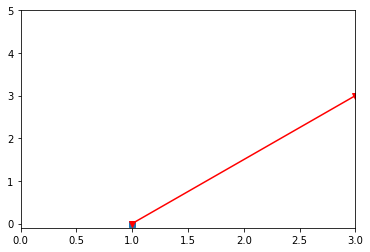

In [68]:
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 3))
ax.set_ylim((-0.1, 5))

line1, = ax.plot([], [], 's')
line2, = ax.plot([], [], 'r-v')

def init():
    line.set_data([], [])
    line2.set_data([],[])
    return (line1, line2)
    
def animate(i):
    x = np.linspace(0, 1, 100)
    line1.set_data(x[i], 0)
    line2.set_data([x[i], x[i] + F[0]], [0, 0 + F[1]]) 
    #plt.quiver(x[i],0,F[0],F[1])
    return (line1, line2)
    
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())